In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import TfidfVectorize


import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusuma.jaipiam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
train_data = pd.read_csv("./dataset/Topic1-youtube_spam_train.csv")

Analysis

In [4]:
train_data['word_count'] = train_data['TEXT'].apply(lambda x: len(str(x).split()))
train_data['char_count'] = train_data['TEXT'].apply(lambda x: len(str(x)))

train_data

,VIDEO,AUTHOR,DATE,TEXT,CLASS,word_count,char_count
0,pRpeEdMmmQ0,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0,5,26
1,pRpeEdMmmQ0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,5,23
2,pRpeEdMmmQ0,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,1,3
3,pRpeEdMmmQ0,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,18,93
4,pRpeEdMmmQ0,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,13,58
...,...,...,...,...,...,...,...
793,9bZkp7q19f0,Ben Stalker,2014-11-07T19:27:45,GANGMAN STY- *D-D-D-D-D-D--DROP THE BASS!!*﻿,0,5,44
794,9bZkp7q19f0,xxxTheMikeTxxx,2014-11-07T19:33:03,Will this song ever reach 7 Billion Views?﻿,0,8,43
795,9bZkp7q19f0,Kemal Kurtoglu,2014-11-07T19:33:46,"Im a RAPPER/SONGWRITER, check my video PLEASE....",1,17,106
796,CevxZvSJLk8,Martwy Karas,2014-11-07T19:33:46,Katy Perry's songs are the best of the songs o...,0,12,63


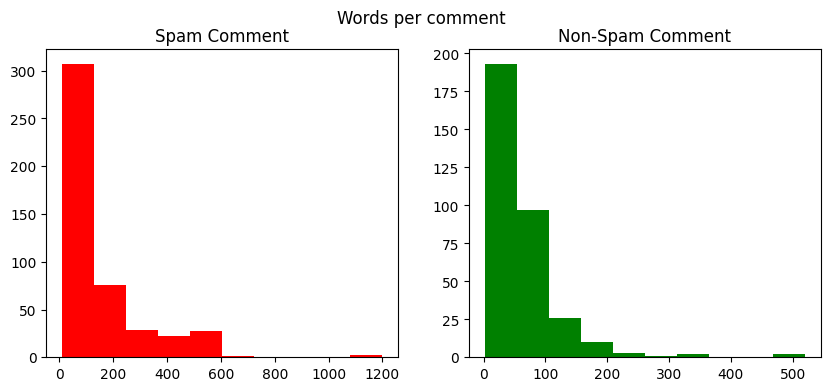

In [5]:
# col = "word_count"
col = "char_count"
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=train_data[train_data['CLASS']==1][col]
ax1.hist(train_words,color='red')
ax1.set_title('Spam Comment')
train_words=train_data[train_data['CLASS']==0][col]
ax2.hist(train_words,color='green')
ax2.set_title('Non-Spam Comment')
fig.suptitle('Words per comment')
plt.show()

Preprocess

In [49]:
# vectorizer = TfidfVectorizer()

def preprocess(text):
    text = text.lower() 
    text = text.strip()  
    texts = [i for i in text.split() if i not in stopwords.words('english')]
    # print(texts)
    return ' '.join(texts)


train_data['processed_text'] = train_data['TEXT'].apply(lambda x: preprocess(x))


In [14]:
train_data.processed_text

0                                    shakira best dancer
1                                       shakira u wiredo
2                                                    wow
3      love song two reasons: 1.it africa 2.i born be...
4                             love song sing camp time!!
                             ...                        
793             gangman sty- *d-d-d-d-d-d--drop bass!!*﻿
794                    song ever reach 7 billion views?﻿
795    im rapper/songwriter, check video please..also...
796        katy perry's songs best songs women artists.﻿
797    hello 29.24% earth population world, hope grea...
Name: processed_text, Length: 798, dtype: object

In [15]:
!py -m pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   --- ------------------------------------ 0.9/10.6 MB 28.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.6 MB 43.5 MB/s eta 0:00:01
   --------------------------- ------------ 7.2/10.6 MB 51.0 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 65.6 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 54.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   -- ------------------------------------- 3.4/45.9 MB 73.0 MB/s eta 0:00:01
   ------ --------------------------------- 7.0/45.9 MB 89.1 MB/s eta 0:00:01
   ---------- ----------------------------- 11.7/45.9 MB 108.8 MB/s eta 0:00:01
   ----

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(ngram_range=(1,2),max_features=100)
vectorizer = CountVectorizer(max_features=80)

matrix = vectorizer.fit_transform(train_data.processed_text)
features = vectorizer.get_feature_names_out()
train_data_vec = pd.DataFrame(data = matrix.toarray(),columns = features)

print(train_data_vec)


     39  also  amp  awesome  back  best  billion  br  chance  channel  ...  \
0     0     0    0        0     0     1        0   0       0        0  ...   
1     0     0    0        0     0     0        0   0       0        0  ...   
2     0     0    0        0     0     0        0   0       0        0  ...   
3     0     0    0        0     0     0        0   0       0        0  ...   
4     0     0    0        0     0     0        0   0       0        0  ...   
..   ..   ...  ...      ...   ...   ...      ...  ..     ...      ...  ...   
793   0     0    0        0     0     0        0   0       0        0  ...   
794   0     0    0        0     0     0        1   0       0        0  ...   
795   0     1    0        0     0     0        0   0       0        0  ...   
796   0     0    0        0     0     1        0   0       0        0  ...   
797   0     0    0        0     0     0        0   0       0        0  ...   

     videos  views  visit  want  watch  world  would  www  you 

In [63]:
train_data.join(train_data_vec)

,VIDEO,AUTHOR,DATE,TEXT,CLASS,word_count,char_count,processed_text,39,also,...,visit,want,watch,website,world,would,www,www facebook,you,youtube
0,pRpeEdMmmQ0,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0,5,26,shakira best dancer,0,0,...,0,0,0,0,0,0,0,0,0,0
1,pRpeEdMmmQ0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,5,23,shakira u wiredo,0,0,...,0,0,0,0,0,0,0,0,0,0
2,pRpeEdMmmQ0,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,1,3,wow,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pRpeEdMmmQ0,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,18,93,love song two reasons: 1.it africa 2.i born be...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,pRpeEdMmmQ0,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,13,58,love song sing camp time!!,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,9bZkp7q19f0,Ben Stalker,2014-11-07T19:27:45,GANGMAN STY- *D-D-D-D-D-D--DROP THE BASS!!*﻿,0,5,44,gangman sty- *d-d-d-d-d-d--drop bass!!*﻿,0,0,...,0,0,0,0,0,0,0,0,0,0
794,9bZkp7q19f0,xxxTheMikeTxxx,2014-11-07T19:33:03,Will this song ever reach 7 Billion Views?﻿,0,8,43,song ever reach 7 billion views?﻿,0,0,...,0,0,0,0,0,0,0,0,0,0
795,9bZkp7q19f0,Kemal Kurtoglu,2014-11-07T19:33:46,"Im a RAPPER/SONGWRITER, check my video PLEASE....",1,17,106,"im rapper/songwriter, check video please..also...",0,1,...,0,0,0,0,0,0,0,0,0,0
796,CevxZvSJLk8,Martwy Karas,2014-11-07T19:33:46,Katy Perry's songs are the best of the songs o...,0,12,63,katy perry's songs best songs women artists.﻿,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
train_data.sample()

,VIDEO,AUTHOR,DATE,TEXT,CLASS,word_count,char_count,processed_text
754,9bZkp7q19f0,TheInfectedDoge Gameplay,2014-11-07T05:04:28,most viewed video in the world﻿,0,6,31,viewed video world﻿


In [56]:
X_train = matrix.toarray()
Y_train = train_data.CLASS.to_numpy()

In [57]:
test_data = pd.read_csv("./dataset/Topic1-youtube_spam_test.csv")
test_data['processed_text'] = test_data['TEXT'].apply(lambda x: preprocess(x))
matrix_test = vectorizer.fit_transform(test_data.processed_text)
X_test = matrix_test.toarray()
Y_test = test_data.CLASS.to_numpy()
# print(matrix_test.shape)
# print(matrix.shape)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Make an instance of the Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=4)
#Train the model on the data
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

In [65]:
from sklearn import metrics
dt_ypred = dt_model.predict(X_test)
print(metrics.classification_report(dt_ypred,Y_test))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75       117
           1       0.65      0.84      0.73        85

    accuracy                           0.74       202
   macro avg       0.75      0.75      0.74       202
weighted avg       0.76      0.74      0.74       202



In [33]:
dt_ypred = dt_model.predict(X_test)
print(metrics.classification_report(dt_ypred,Y_test))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74       118
           1       0.64      0.83      0.72        84

    accuracy                           0.73       202
   macro avg       0.74      0.75      0.73       202
weighted avg       0.76      0.73      0.73       202



In [34]:
train_data

,VIDEO,AUTHOR,DATE,TEXT,CLASS,word_count,char_count,processed_text
0,pRpeEdMmmQ0,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0,5,26,shakira best dancer
1,pRpeEdMmmQ0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,5,23,shakira u wiredo
2,pRpeEdMmmQ0,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,1,3,wow
3,pRpeEdMmmQ0,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,18,93,love song two reasons: 1.it africa 2.i born be...
4,pRpeEdMmmQ0,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,13,58,love song sing camp time!!
...,...,...,...,...,...,...,...,...
793,9bZkp7q19f0,Ben Stalker,2014-11-07T19:27:45,GANGMAN STY- *D-D-D-D-D-D--DROP THE BASS!!*﻿,0,5,44,gangman sty- *d-d-d-d-d-d--drop bass!!*﻿
794,9bZkp7q19f0,xxxTheMikeTxxx,2014-11-07T19:33:03,Will this song ever reach 7 Billion Views?﻿,0,8,43,song ever reach 7 billion views?﻿
795,9bZkp7q19f0,Kemal Kurtoglu,2014-11-07T19:33:46,"Im a RAPPER/SONGWRITER, check my video PLEASE....",1,17,106,"im rapper/songwriter, check video please..also..."
796,CevxZvSJLk8,Martwy Karas,2014-11-07T19:33:46,Katy Perry's songs are the best of the songs o...,0,12,63,katy perry's songs best songs women artists.﻿


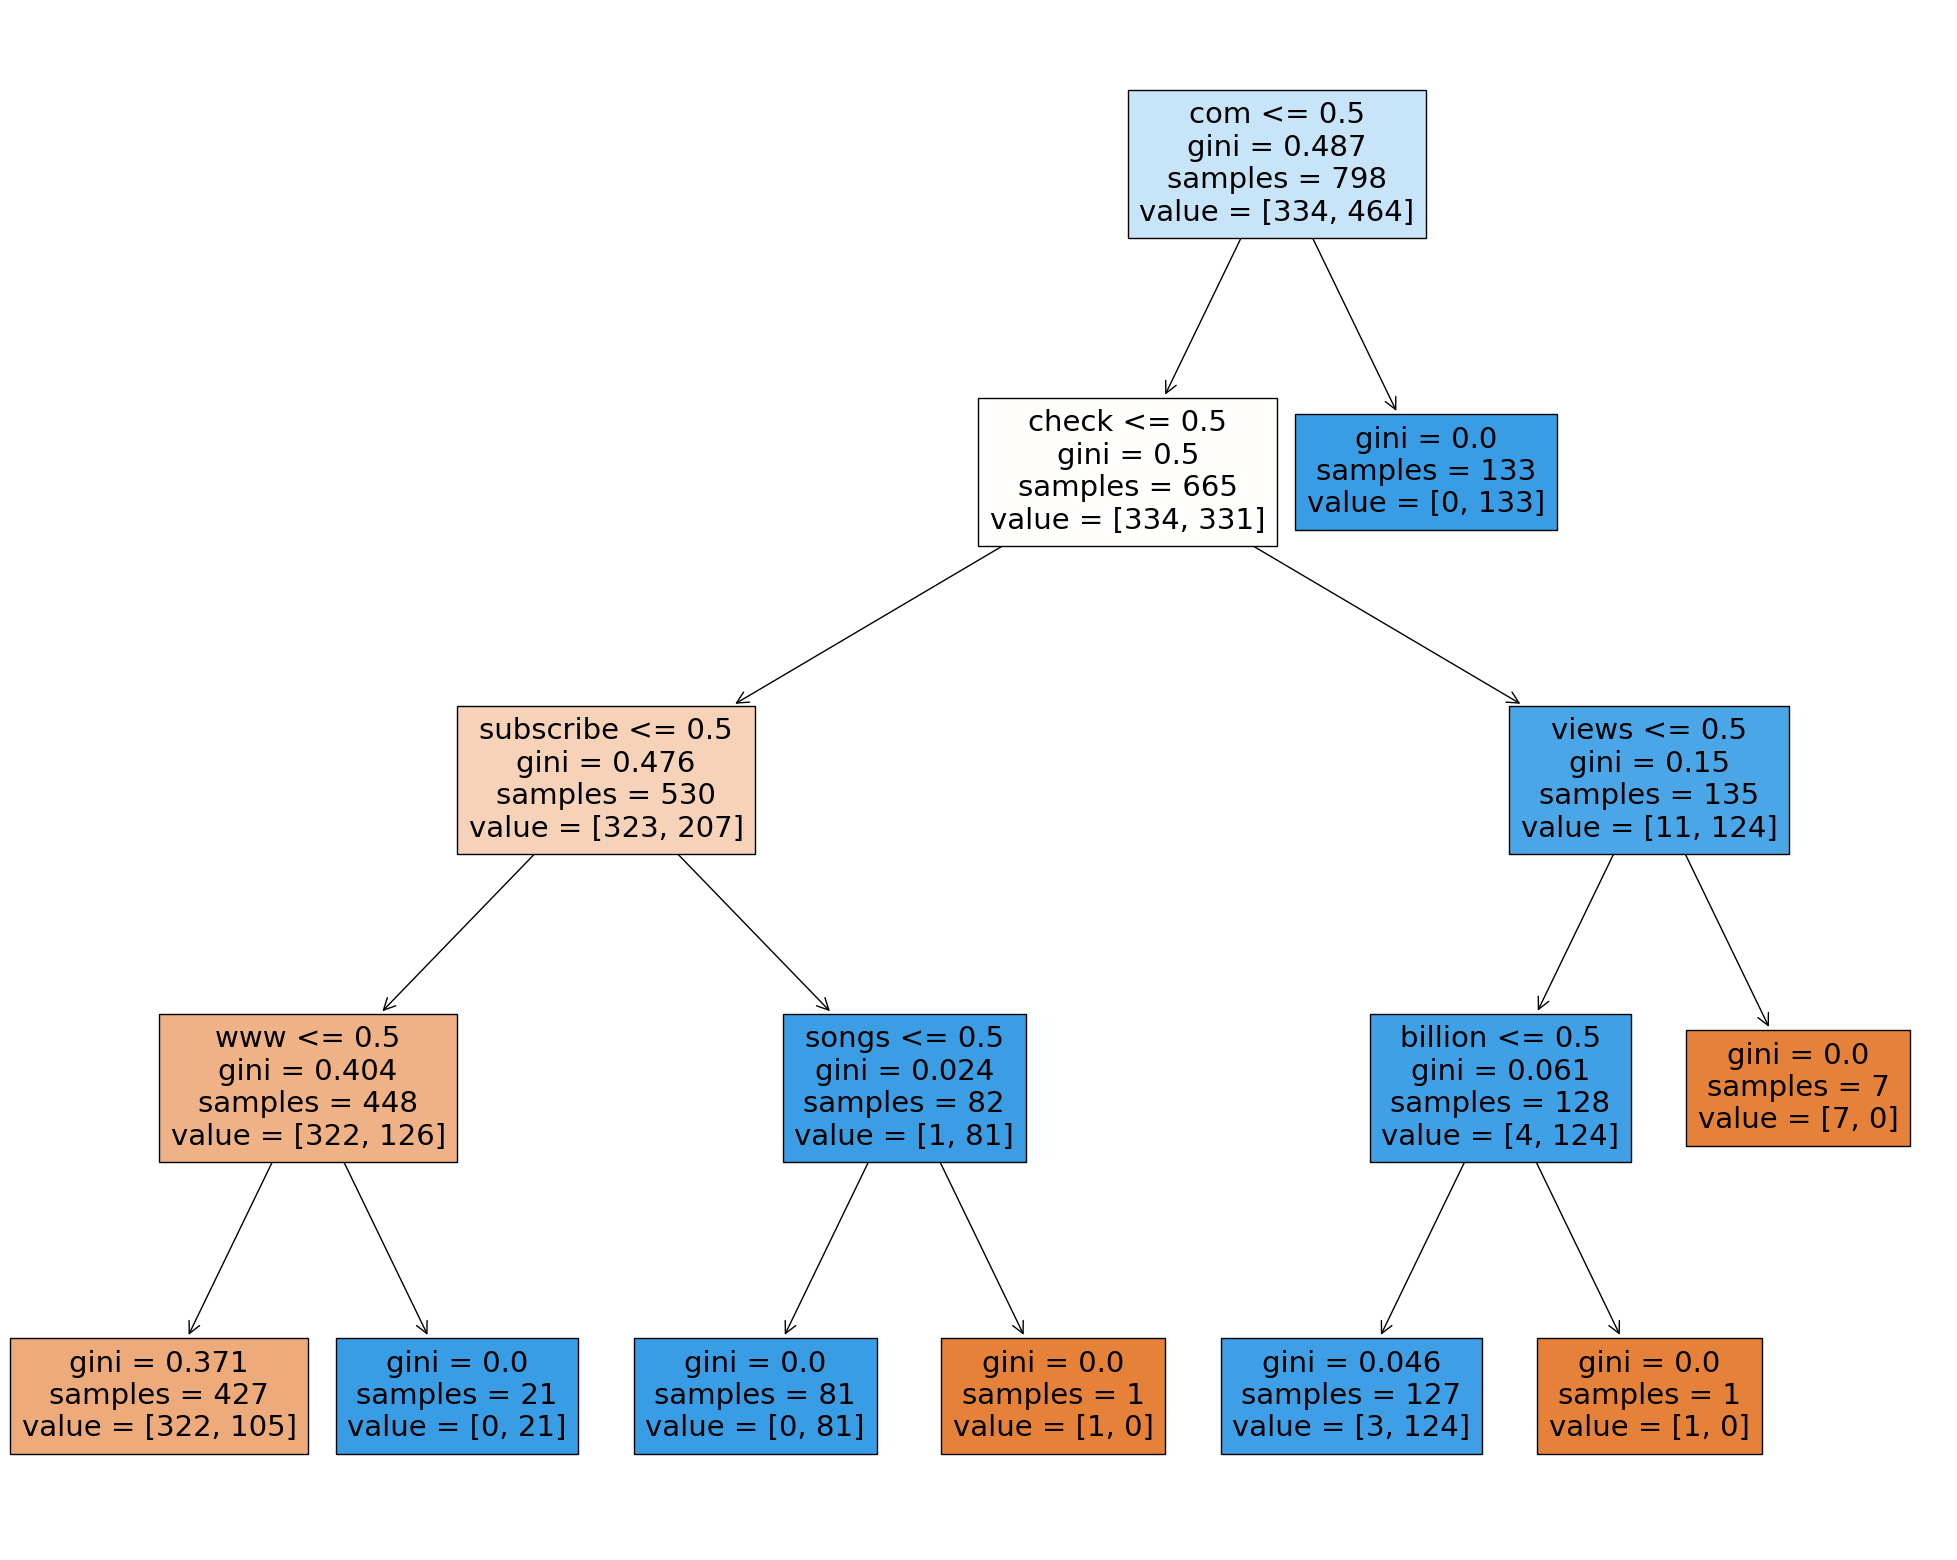

In [63]:
tree.export_text(dt_model)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=features,  
                #    class_names=[0,1],
                   filled=True)
